# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [18]:
weather_api_key

'7ad9b4e68dc331254959ea5d9aa586f2'

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"




# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"# YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()

        # Parse the JSON and retrieve data
        city_weather = weather_json["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beringovskiy
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | natchitoches
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | sodertalje
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | galle
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | kuzino
Processing Record 19 of Set 1 | jiuquan
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 

Processing Record 38 of Set 4 | sitio novo do tocantins
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 41 of Set 4 | west plains
Processing Record 42 of Set 4 | aksu
Processing Record 43 of Set 4 | batemans bay
Processing Record 44 of Set 4 | roald
Processing Record 45 of Set 4 | luanda
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | marsa matruh
Processing Record 48 of Set 4 | marsabit
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | bodden town
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | sampit
Processing Record 3 of Set 5 | kodinsk
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | puerto madryn
Processing Record 9 of Set 5 | vai

City not found. Skipping...
Processing Record 23 of Set 8 | gamba
Processing Record 24 of Set 8 | mount abu
Processing Record 25 of Set 8 | lebowakgomo
Processing Record 26 of Set 8 | cortes
Processing Record 27 of Set 8 | acari
Processing Record 28 of Set 8 | ous
Processing Record 29 of Set 8 | nagato
Processing Record 30 of Set 8 | ulaangom
Processing Record 31 of Set 8 | pombia
Processing Record 32 of Set 8 | jatiroto
Processing Record 33 of Set 8 | kozluk
Processing Record 34 of Set 8 | kenai
Processing Record 35 of Set 8 | troitskoye
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | maragogi
Processing Record 38 of Set 8 | joao pinheiro
Processing Record 39 of Set 8 | mahajanga
Processing Record 40 of Set 8 | great falls
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 8 | 

City not found. Skipping...
Processing Record 13 of Set 12 | mayor pablo lagerenza
Processing Record 14 of Set 12 | hami
Processing Record 15 of Set 12 | chernogolovka
Processing Record 16 of Set 12 | kamenka
Processing Record 17 of Set 12 | mill valley
Processing Record 18 of Set 12 | punta alta
Processing Record 19 of Set 12 | pinawa
Processing Record 20 of Set 12 | taltal
Processing Record 21 of Set 12 | olafsvik
Processing Record 22 of Set 12 | olutanga
Processing Record 23 of Set 12 | ostrovnoy
Processing Record 24 of Set 12 | lukovetskiy
Processing Record 25 of Set 12 | santa rosa
Processing Record 26 of Set 12 | saint-francois
Processing Record 27 of Set 12 | necochea
Processing Record 28 of Set 12 | zabaykalsk
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | chama
Processing Record 31 of Set 12 | wegrow
Processing Record 32 of Set 12 | xiongzhou
Processing Record 33 of Set 12 | purna
Processing Record 34 of Set 12 | vanimo
Pr

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)


#Show Record count
city_data_df.count()

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beringovskiy,63.0500,179.3167,-21.53,97,100,5.27,RU,1676832141
1,mataura,-46.1927,168.8643,10.80,97,39,1.21,NZ,1676832142
2,kapaa,22.0752,-159.3190,21.99,94,100,2.29,US,1676832143
3,nanortalik,60.1432,-45.2371,-6.56,80,100,3.14,GL,1676832143
4,albany,42.6001,-73.9662,7.75,44,100,2.24,US,1676832136


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beringovskiy,63.0500,179.3167,-21.53,97,100,5.27,RU,1676832141
1,mataura,-46.1927,168.8643,10.80,97,39,1.21,NZ,1676832142
2,kapaa,22.0752,-159.3190,21.99,94,100,2.29,US,1676832143
3,nanortalik,60.1432,-45.2371,-6.56,80,100,3.14,GL,1676832143
4,albany,42.6001,-73.9662,7.75,44,100,2.24,US,1676832136


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

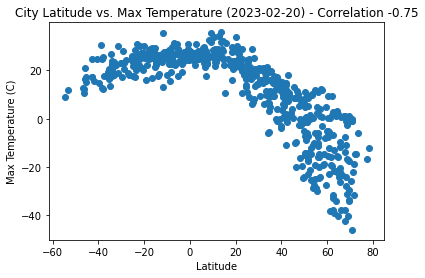

In [12]:
#pdte que se imprima en el archivo la grafica 
#pdte black circle each point 
# Build scatter plot for latitude vs. temperature
# Create a graph 
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# set the labels and titlle
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Max Temp"])

plt.title(f"City Latitude vs. Max Temperature ({date.today()}) - Correlation {round(correlation[0],2)}")


# Save the figure
plt.savefig("output_data/Fig1.png",pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ='g',)
            
# Show plot
plt.show()

In [12]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        575 non-null    object 
 1   Lat         575 non-null    float64
 2   Lng         575 non-null    float64
 3   Max Temp    575 non-null    float64
 4   Humidity    575 non-null    int64  
 5   Cloudiness  575 non-null    int64  
 6   Wind Speed  575 non-null    float64
 7   Country     574 non-null    object 
 8   Date        575 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.9+ KB


#### Latitude Vs. Humidity

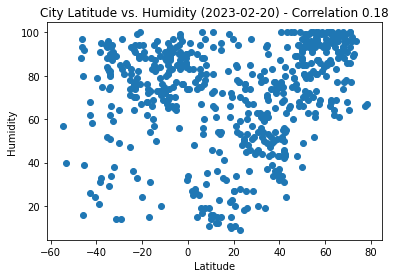

In [13]:
#pdte que se imprima en el archivo la grafica
# Build the scatter plots for latitude vs. humidity

# Create a graph 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# set the labels and titlle
plt.xlabel("Latitude")
plt.ylabel("Humidity")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Humidity"])

plt.title(f"City Latitude vs. Humidity ({date.today()}) - Correlation {round(correlation[0],2)}")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [14]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        575 non-null    object 
 1   Lat         575 non-null    float64
 2   Lng         575 non-null    float64
 3   Max Temp    575 non-null    float64
 4   Humidity    575 non-null    int64  
 5   Cloudiness  575 non-null    int64  
 6   Wind Speed  575 non-null    float64
 7   Country     574 non-null    object 
 8   Date        575 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.9+ KB


#### Latitude Vs. Cloudiness

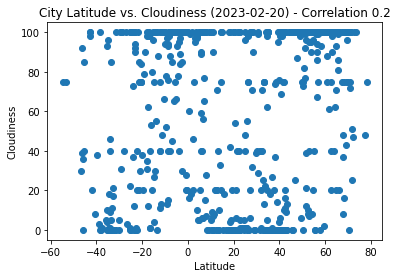

In [14]:
#pdte que se imprima en el archivo la grafica
# Build the scatter plots for latitude vs. cloudiness

# Create a graph 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# set the labels and titlle
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Cloudiness"])

plt.title(f"City Latitude vs. Cloudiness ({date.today()}) - Correlation {round(correlation[0],2)}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [16]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        575 non-null    object 
 1   Lat         575 non-null    float64
 2   Lng         575 non-null    float64
 3   Max Temp    575 non-null    float64
 4   Humidity    575 non-null    int64  
 5   Cloudiness  575 non-null    int64  
 6   Wind Speed  575 non-null    float64
 7   Country     574 non-null    object 
 8   Date        575 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.9+ KB


#### Latitude vs. Wind Speed Plot

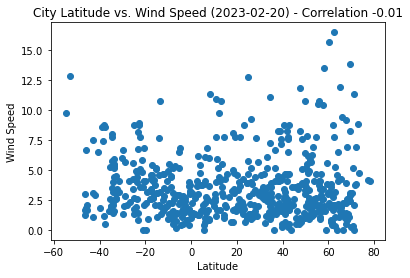

In [15]:
# pdte que se imprima en el archivo la grafica
# Build the scatter plots for latitude vs. Wind Speed

# Create a graph 
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# set the labels and titlle
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Wind Speed"])

plt.title(f"City Latitude vs. Wind Speed ({date.today()}) - Correlation {round(correlation[0],2)}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [18]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        575 non-null    object 
 1   Lat         575 non-null    float64
 2   Lng         575 non-null    float64
 3   Max Temp    575 non-null    float64
 4   Humidity    575 non-null    int64  
 5   Cloudiness  575 non-null    int64  
 6   Wind Speed  575 non-null    float64
 7   Country     574 non-null    object 
 8   Date        575 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 44.9+ KB


In [54]:
#city_data_df["Lat"].max()*.90
#

# y_values
city_data_df["Lat"].mean()*1.35

26.758581730434784

In [57]:
# x_values
# x_values.min()+ x_values.min()*.25
city_data_df["Max Temp"].mean()

11.400017391304349

---

## Requirement 2: Compute Linear Regression for Each Relationship


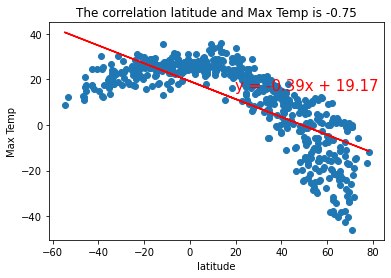

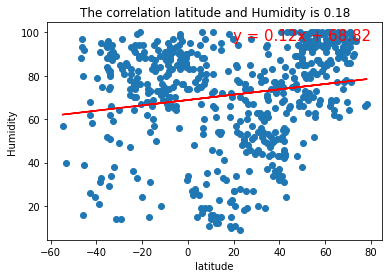

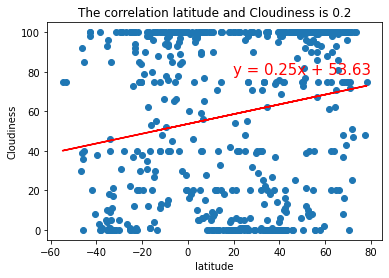

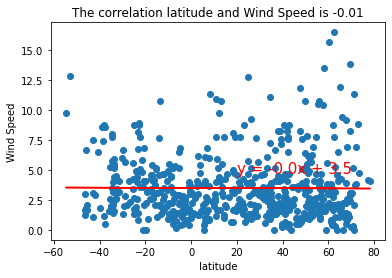

In [26]:
# Define a function to create Linear Regression plots


def  create_linear_regression_plot(x_values, y_values,x_label,y_label):
    # Add the linear regression equation and line to plot --> correlation Latitude and Max Temperature 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # calculate ubication of ecuation
    x_ub = float(x_values.mean())
    y_ub =float(y_values.mean()*1.35)
    plt.annotate(line_eq,(x_ub,y_ub),fontsize=15,color="red")
    
    correlation = st.pearsonr(x_values,y_values)

    plt.title(f"The correlation {x_label} and {y_label} is {round(correlation[0],2)}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


# print the Linear Regression plots for each Characteristic based on the next list

list_Property = ["Max Temp","Humidity","Cloudiness","Wind Speed"]

for property in list_Property:
    
    create_linear_regression_plot(city_data_df["Lat"],city_data_df[property],"latitude",property)




In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beringovskiy,63.0500,179.3167,-21.53,97,100,5.27,RU,1676832141
2,kapaa,22.0752,-159.3190,21.99,94,100,2.29,US,1676832143
3,nanortalik,60.1432,-45.2371,-6.56,80,100,3.14,GL,1676832143
4,albany,42.6001,-73.9662,7.75,44,100,2.24,US,1676832136
5,natchitoches,31.7668,-93.1335,19.99,56,40,4.63,US,1676832145


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,168.8643,10.80,97,39,1.21,NZ,1676832142
6,busselton,-33.6500,115.3333,18.09,66,5,5.53,AU,1676832145
8,hithadhoo,-0.6000,73.0833,27.35,74,20,3.03,MV,1676832146
9,saint-philippe,-21.3585,55.7679,26.77,88,85,5.87,RE,1676832147
10,rikitea,-23.1203,-134.9692,26.48,75,90,8.20,PF,1676832148


The correlation between both factors is -0.85


###  Temperature vs. Latitude Linear Regression Plot

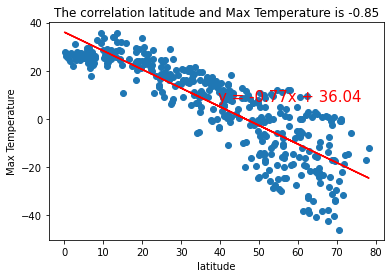

In [27]:
# Linear regression on Northern Hemisphere


create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"latitude","Max Temperature")

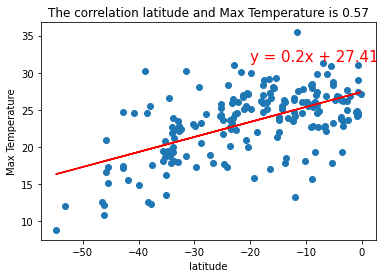

In [28]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"latitude","Max Temperature")

In [29]:
southern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        189 non-null    object 
 1   Lat         189 non-null    float64
 2   Lng         189 non-null    float64
 3   Max Temp    189 non-null    float64
 4   Humidity    189 non-null    int64  
 5   Cloudiness  189 non-null    int64  
 6   Wind Speed  189 non-null    float64
 7   Country     188 non-null    object 
 8   Date        189 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.8+ KB


**Discussion about the linear relationship:

Considering The linear regression for latitud and temperature of most of 500 cities, we see a negative correlation for cities located in  Northern Hemisphere. Having said that, we confirm that, for the cities in Northern Hemisphere, the less latitude, the less temperature. On the other hand, for cities in Southern Hemisphere, we confirm that, the more latitude, the  temperature.


### Humidity vs. Latitude Linear Regression Plot

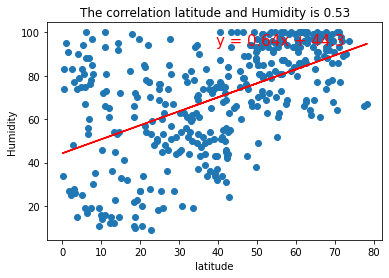

In [30]:
# Linear regression on Northern Hemisphere

create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"latitude","Humidity")

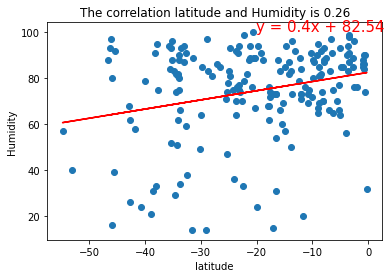

In [31]:
# # Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"latitude","Humidity")

**Discussion about the linear relationship:** 

The linear regression considering latitud and humidity of most of 500 cities shows a positive correlation for cities located in  Northern Hemisphere so as Southern Hemisphere. Having said that, we confirm that, for the cities in Northern and Southern Hemisphere, the more latitude, the more humidity.

### Cloudiness vs. Latitude Linear Regression Plot

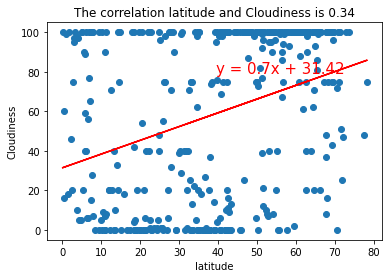

In [32]:
# Northern Hemisphere

create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"latitude","Cloudiness")

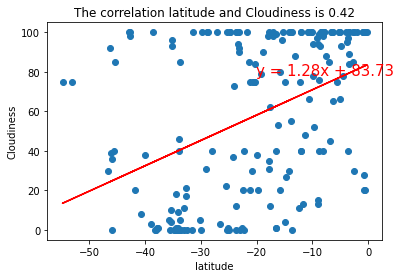

In [33]:
# Southern Hemisphere

create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"latitude","Cloudiness")

In [34]:
southern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        189 non-null    object 
 1   Lat         189 non-null    float64
 2   Lng         189 non-null    float64
 3   Max Temp    189 non-null    float64
 4   Humidity    189 non-null    int64  
 5   Cloudiness  189 non-null    int64  
 6   Wind Speed  189 non-null    float64
 7   Country     188 non-null    object 
 8   Date        189 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.8+ KB


**Discussion about the linear relationship:

The linear regression considering latitud and Cloudiness of most of 500 cities shows a very positive correlation for cities located in  Northern Hemisphere so as Southern Hemisphere. Having said that, we confirm that, for the cities in Northern and Southern Hemisphere, the more latitude, the more Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

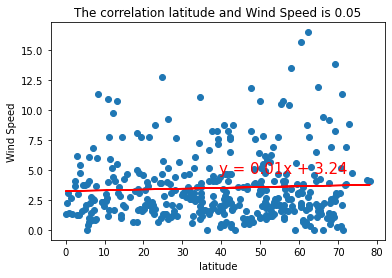

In [35]:
# Northern Hemisphere

create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"latitude","Wind Speed")

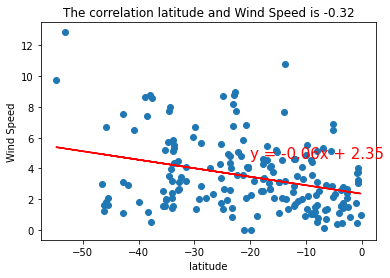

In [36]:
# Southern Hemisphere

create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"latitude","Wind Speed")

**Discussion about the linear relationship:

Cloudiness
The linear regression considering latitud and Wind Speed of most of 500 cities shows that the wind Speed is steady all over the Northern Hemisphere; on the other hand, for the Southern Hemisphere, we can see that, the more latitude, the less Wind Speed.